<a href="https://colab.research.google.com/github/eserrabaysal/course-notes/blob/main/day4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Bağımsız değişkenler =x
bağımlı değişkenler =y
sabit terimin görevi sonucu 0 çıkartmamak
Linear regresyonda tek bir değişkenin
0 ve 1 arasında bir değer alıyor. İyi bir tahminleme yapamadığını gösterir.
MSE 0 a ne kadar yakınsa o kadar başarılı bir yöntem olmuş olabilir.Büyük hataları daha fazla önemser.Sadece MSE ye bakılarak bir tahmin yapılmaz.
Bağımsız değişken sayısı arttıkça R2 değeri artabilir.
R^2 gördüğmde 0 yakın olduğunu açıklayabilirim.Errorlarda 0 a yakın değerleri bulmak gerekebilir.

In [ ]:
import numpy as np
import pandas as pd

data={

      "ev_boyutu":[50,60,70,80,90,100,110,120,130,140],
      "ev_fiyatı":[200000,250000,300000,350000,400000,450000,500000,550000,600000,650000]
}
df=pd.DataFrame(data)
print(df)

   ev_boyutu  ev_fiyatı
0         50     200000
1         60     250000
2         70     300000
3         80     350000
4         90     400000
5        100     450000
6        110     500000
7        120     550000
8        130     600000
9        140     650000


In [ ]:
X=df[["ev_boyutu"]];
y=df.ev_fiyatı;

In [ ]:
from sklearn.model_selection  import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(8, 1)
(8,)
(2, 1)
(2,)


In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred=model.predict(X_test)
print(y_test)
print(y_pred)

8    600000
1    250000
Name: ev_fiyatı, dtype: int64
[600000. 250000.]


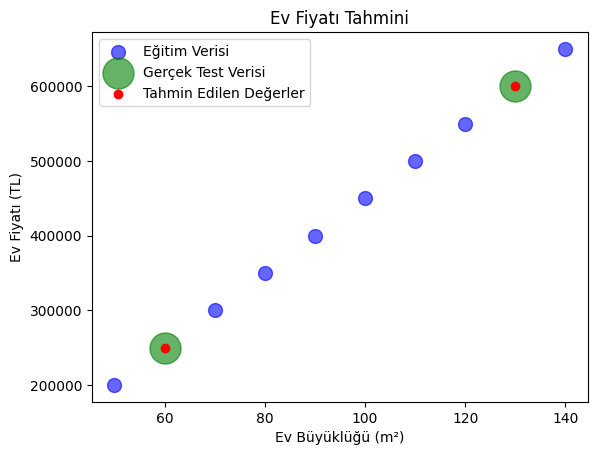

In [ ]:
import matplotlib.pyplot as plt

# Sonuçları görselleştirme
plt.scatter(X_train, y_train, color='blue', label='Eğitim Verisi',alpha=0.6, s=100)  # Eğitim verisini göstermek için
plt.scatter(X_test, y_test, color='green', label='Gerçek Test Verisi',alpha=0.6, s=500)  # Gerçek test verisini göstermek için
plt.scatter(X_test, y_pred, color='red', label='Tahmin Edilen Değerler')  # Tahmin edilen değerleri göstermek için
plt.xlabel('Ev Büyüklüğü (m²)')
plt.ylabel('Ev Fiyatı (TL)')
plt.title('Ev Fiyatı Tahmini')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Modelin katsayısı ve doğruluk ölçümleri
# Değerlendirme metrikleri
# Sabit terim (intercept) ve eğim katsayısı (slope)
print(f'β0 (Sabit terim): {model.intercept_}')
print(f'β1 (Eğim katsayısı): {model.coef_[0]}')

# R² skoru
r2 = r2_score(y_test, y_pred)
print(f'R² Score: {r2}')

# Adjusted R² skoru
n = X_test.shape[0]  # Gözlem sayısı
p = X_test.shape[1]  # Bağımsız değişken sayısı
try:
   adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
except ZeroDivisionError:
   adjusted_r2 = "Nan"
print(f'Adjusted R² Score: {adjusted_r2}')

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')

β0 (Sabit terim): -50000.00000000006
β1 (Eğim katsayısı): 5000.000000000001
R² Score: 1.0
Adjusted R² Score: Nan
Mean Squared Error (MSE): 0.0
Root Mean Squared Error (RMSE): 0.0
Mean Absolute Error (MAE): 0.0
